In [1]:
import gempy as gp
import rasterio
import geopandas as gpd
import numpy as np
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
from matplotlib.colors import ListedColormap

import pandas as pd
import matplotlib.pyplot as plt
import os

from requests import Request
from owslib.wfs import WebFeatureService


Some basic investigation via SARIG web services

In [3]:
#you need owlib for this to work
url = 'https://services.sarig.sa.gov.au/vector/geology/wfs?version=1.1.0'
wfs = gg.web.load_wfs(url)
wfs

In [8]:
print(wfs.identification.type, wfs.identification.title)
print([op.name for op in wfs.operations])
print(wfs.getOperationByName('GetFeature').formatOptions)
list(wfs.contents)

WFS GeoServer Web Feature Service
['GetCapabilities', 'DescribeFeatureType', 'GetFeature', 'Transaction', 'LockFeature', 'GetFeatureWithLock']
['{http://www.opengis.net/wfs}KML', '{http://www.opengis.net/wfs}GML2', '{http://www.opengis.net/wfs}GML3', '{http://www.opengis.net/wfs}SHAPE-ZIP', '{http://www.opengis.net/wfs}CSV', '{http://www.opengis.net/wfs}JSON']


['geology:100k_geology__visible_500k__mapunit',
 'geology:2m_geology__visible_5m',
 'geology:surface_geology_7m',
 'geology:apy_lands_palaeodrainage_neogene',
 'geology:all_petroleum_basins',
 'geology:archaean_to_early_mesoproterozoic',
 'geology:biostratigraphy__subset__mesozoic_cenozoic',
 'geology:cainozoic',
 'geology:cambrian_to_late_carboniferous',
 'geology:tertiary_coastal_barrier_sediments',
 'geology:field_observation_sites',
 'geology:induration_calareous',
 'geology:induration_ferruginous',
 'geology:induration_gypsiferous',
 'geology:induration_mixed_calcareous_and_gypsiferous',
 'geology:induration_siliceous',
 'geology:induration_undifferentiated',
 'geology:inverted_palaeochannel_sediments',
 'geology:jurassic_to_cretaceous',
 'geology:late_carboniferous_to_triassic',
 'geology:middle_to_late_mesoproterozoic',
 'geology:neoproterozoic',
 'geology:mesozoic_sediments',
 'geology:neogene_or_undifferentiated_tertiary_sediments',
 'geology:palaeogene_sediments',
 'geology:p

### Solid Geology Layers

We are interested in 'geology:middle_to_late_mesoproterozoic', 'geology:neoproterozoic', and 'geology:archaean_to_early_mesoproterozoic'
The middle mesoproterozoic can be downloaded individually from SARIG https://map.sarig.sa.gov.au/ but appears to be combined here as it is only small and a single unit in comparison

In [18]:
layers = ['geology:neoproterozoic','geology:middle_to_late_mesoproterozoic','geology:archaean_to_early_mesoproterozoic']

In [19]:
prot_list = []
for protlayer in layers:
    params = dict(service='WFS', version="1.1.0", request='GetFeature',typeName=protlayer, outputFormat='json')
    q = Request('GET', url, params=params).prepare().url

    prot_data = gpd.read_file(q)
    prot_list.append(prot_data)


Look at the Archaean layer

In [21]:
prot_list[2]

,id,OBJECTID,NAME,TIME_SLICE,SHAPE_LENG,SHAPE_LENGTH,SHAPE_AREA,geometry
0,archaean_to_early_mesoproterozoic.1,1,Kersaint Province,Archaean to early Mesoproterozoic,4.18,4.18,0.80,"POLYGON ((137.54431 -36.53662, 137.63713 -36.5..."
1,archaean_to_early_mesoproterozoic.2,2,Arunta Block,Archaean to early Mesoproterozoic,3.15,3.15,0.37,"POLYGON ((140.78366 -26.50348, 140.77137 -26.5..."
2,archaean_to_early_mesoproterozoic.3,3,Coompana Block,Archaean to early Mesoproterozoic,6.52,6.52,1.86,"POLYGON ((129.45560 -30.54582, 129.43437 -30.5..."
3,archaean_to_early_mesoproterozoic.4,4,Curnamona Province,Archaean to early Mesoproterozoic,9.25,9.25,4.05,"POLYGON ((139.57928 -29.76132, 139.59191 -29.7..."
4,archaean_to_early_mesoproterozoic.5,5,Gawler Province,Archaean to early Mesoproterozoic,37.64,37.64,66.93,"POLYGON ((138.00966 -27.04165, 138.01353 -27.1..."
5,archaean_to_early_mesoproterozoic.6,6,Gawler Province cratonic core (Gawler Craton),Archaean to early Mesoproterozoic,31.78,31.78,50.65,"MULTIPOLYGON (((136.25226 -27.40125, 136.30573..."


Plot the output to check

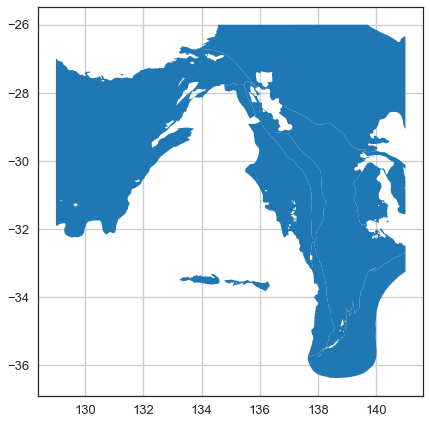

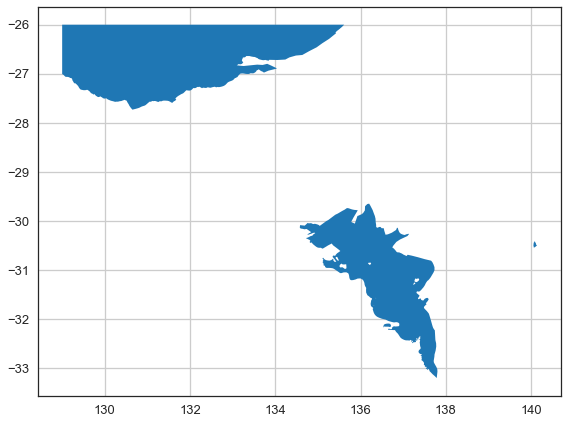

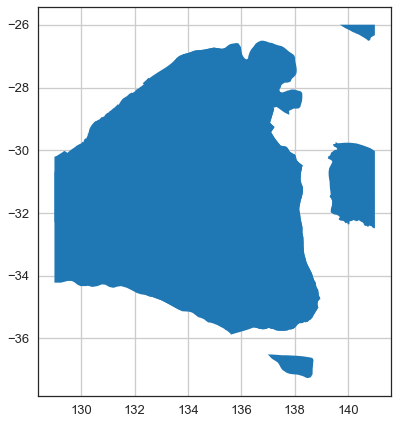

In [22]:
for protmap in prot_list:
    protmap.plot()
    plt.grid()